# Ingest

## Importations of libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import copy
import joblib

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, Input, Concatenate, BatchNormalization, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, Adamax, SGD
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.initializers import Zeros,RandomNormal

## Import dataset

In [2]:
dataset = joblib.load('../features/all_features.sav')
type(dataset)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

## Snooping Around

In [3]:
dataset.head()

Fp1_100ms_1KHz  Fp1_200ms_1KHz  Fp1_300ms_1KHz  Fp1_400ms_1KHz  \
0        0.077860       -0.182622        0.279247        0.532200   
1        0.771830        0.206960       -0.262004        0.052639   
2        0.586741       -0.170640       -0.447587       -0.586851   
3        0.406416       -0.055197        0.553940        0.478676   
4       -0.716653        0.162533        0.245087        0.260570   

   Fp1_450ms_1KHz  Fp2_100ms_1KHz  Fp2_200ms_1KHz  Fp2_300ms_1KHz  \
0       -0.204365        0.250417       -0.064930       -0.427962   
1       -0.076961       -0.243638        0.362590        0.186396   
2       -0.381786       -0.296674        0.182709        0.486881   
3       -0.329155        0.078385       -0.046267       -0.688571   
4        0.948333        0.447810       -0.711307       -0.258017   

   Fp2_400ms_1KHz  Fp2_450ms_1KHz  ...  centralEntropy(rest1)  \
0       -0.472420        0.012483  ...               4.809451   
1       -0.309906       -0.096431  ...               3.839269   
2        0.388464        0.047760  ...               4.763656   
3       -0.429975       -0.139107  ...               4.242247   
4       -0.445835       -0.478240  ...               2.855066   

   centralEntropy(arith)  centralEntropy(rest2)  temporalEntropy(rest1)  \
0               5.332050               4.091032                3.945999   
1               5.369243               4.069415                4.937621   
2               5.216139               4.599104                5.372436   
3               4.865794               4.172947                4.146636   
4               3.324150               2.402615                3.409738   

   temporalEntropy(arith)  temporalEntropy(rest2)  occipitalEntropy(rest1)  \
0                7.283139                6.148835                 3.456758   
1                6.763848                6.930828                 4.794076   
2                5.346930                4.132445                 4.890854   
3                5.137967                4.114244                 3.833269   
4                3.626762                1.482925                 2.891582   

   occipitalEntropy(arith)  occipitalEntropy(rest2)  category  
0                 6.826992                 5.377234   Patient  
1                 6.667069                 5.826653   Patient  
2                 5.269775                 4.451813   Control  
3                 5.130625                 4.248905   Control  
4                 3.512754                 2.293883   Control  

[5 rows x 321 columns]

In [4]:
dataset.describe()

Fp1_100ms_1KHz  Fp1_200ms_1KHz  Fp1_300ms_1KHz  Fp1_400ms_1KHz  \
count       45.000000       45.000000       45.000000       45.000000   
mean         0.115363       -0.051501        0.076797        0.058663   
std          0.503851        0.344380        0.334743        0.432359   
min         -0.815991       -0.671149       -0.685429       -0.885361   
25%         -0.317453       -0.280111       -0.163746       -0.216385   
50%          0.240041       -0.062094        0.151691        0.052639   
75%          0.577841        0.213785        0.290899        0.349477   
max          0.771830        0.681047        0.709743        0.817380   

       Fp1_450ms_1KHz  Fp2_100ms_1KHz  Fp2_200ms_1KHz  Fp2_300ms_1KHz  \
count       45.000000       45.000000       45.000000       45.000000   
mean        -0.103720        0.001778       -0.001258       -0.042371   
std          0.464893        0.441086        0.347603        0.416247   
min         -0.812857       -0.803061       -0.773213       -0.714578   
25%         -0.447365       -0.340735       -0.168995       -0.358391   
50%         -0.112249       -0.027864        0.025479       -0.070448   
75%          0.101267        0.311511        0.220466        0.324228   
max          0.948333        0.831922        0.724213        0.773255   

       Fp2_400ms_1KHz  Fp2_450ms_1KHz  ...  parietalEntropy(rest2)  \
count       45.000000       45.000000  ...               45.000000   
mean        -0.051057       -0.013854  ...                4.851188   
std          0.465245        0.490661  ...                1.785314   
min         -0.845384       -0.860885  ...                2.128722   
25%         -0.433019       -0.390993  ...                3.137426   
50%         -0.127707       -0.096431  ...                5.009800   
75%          0.387438        0.507937  ...                5.650391   
max          0.750365        0.822368  ...                9.572494   

       centralEntropy(rest1)  centralEntropy(arith)  centralEntropy(rest2)  \
count              45.000000              45.000000              45.000000   
mean                4.481702               5.774285               4.587774   
std                 1.587790               1.889525               1.715760   
min                 1.975982               2.129566               1.621041   
25%                 3.286599               3.852164               3.063503   
50%                 4.251184               5.991856               4.599104   
75%                 5.464230               7.407162               5.371057   
max                 9.141592               8.847224               8.996514   

       temporalEntropy(rest1)  temporalEntropy(arith)  temporalEntropy(rest2)  \
count               45.000000               45.000000               45.000000   
mean                 4.689325                6.580613                4.880317   
std                  1.433597                2.037625                1.696056   
min                  1.374844                2.904443                1.482925   
25%                  3.898383                4.990185                3.701527   
50%                  4.737698                7.003274                5.023968   
75%                  5.953930                8.049676                6.076505   
max                  7.846541               10.523407                8.577266   

       occipitalEntropy(rest1)  occipitalEntropy(arith)  \
count                45.000000                45.000000   
mean                  4.540303                 6.134899   
std                   1.529989                 2.073115   
min                   1.997057                 1.996069   
25%                   3.380543                 4.054229   
50%                   4.555083                 6.500328   
75%                   5.641581                 8.160295   
max                   7.895410                 9.202006   

       occipitalEntropy(rest2)  
count                45.000000  
mean                  4.80192

In [5]:
dataset.select_dtypes(include='object').columns

Index(['index', 'category'], dtype='object')

In [6]:
dataset.isnull().values.any()

False

## count plot

<Axes: xlabel='category', ylabel='count'>

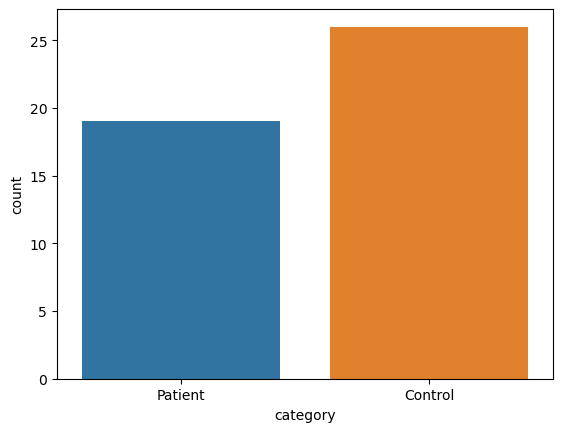

In [7]:
sns.countplot(dataset,x='category')

In [8]:
dataset.value_counts('category')

category
Control    26
Patient    19
dtype: int64

## Correlations

In [9]:
dataset2 = dataset.drop(columns='category', inplace=False)

In [10]:
dataset.shape

(45, 321)

In [11]:
dataset2.shape

(45, 320)

In [12]:
features_correlation = dataset2.corrwith(dataset.category=='Patient',axis=0,drop=False,method='pearson')

significant_features = abs(features_correlation)>=0.1

features_correlation = features_correlation[significant_features.to_list()]

features_correlation = abs(features_correlation).sort_values(ascending=False)

/tmp/ipykernel_32126/1499337129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features_correlation = dataset2.corrwith(dataset.category=='Patient',axis=0,drop=False,method='pearson')


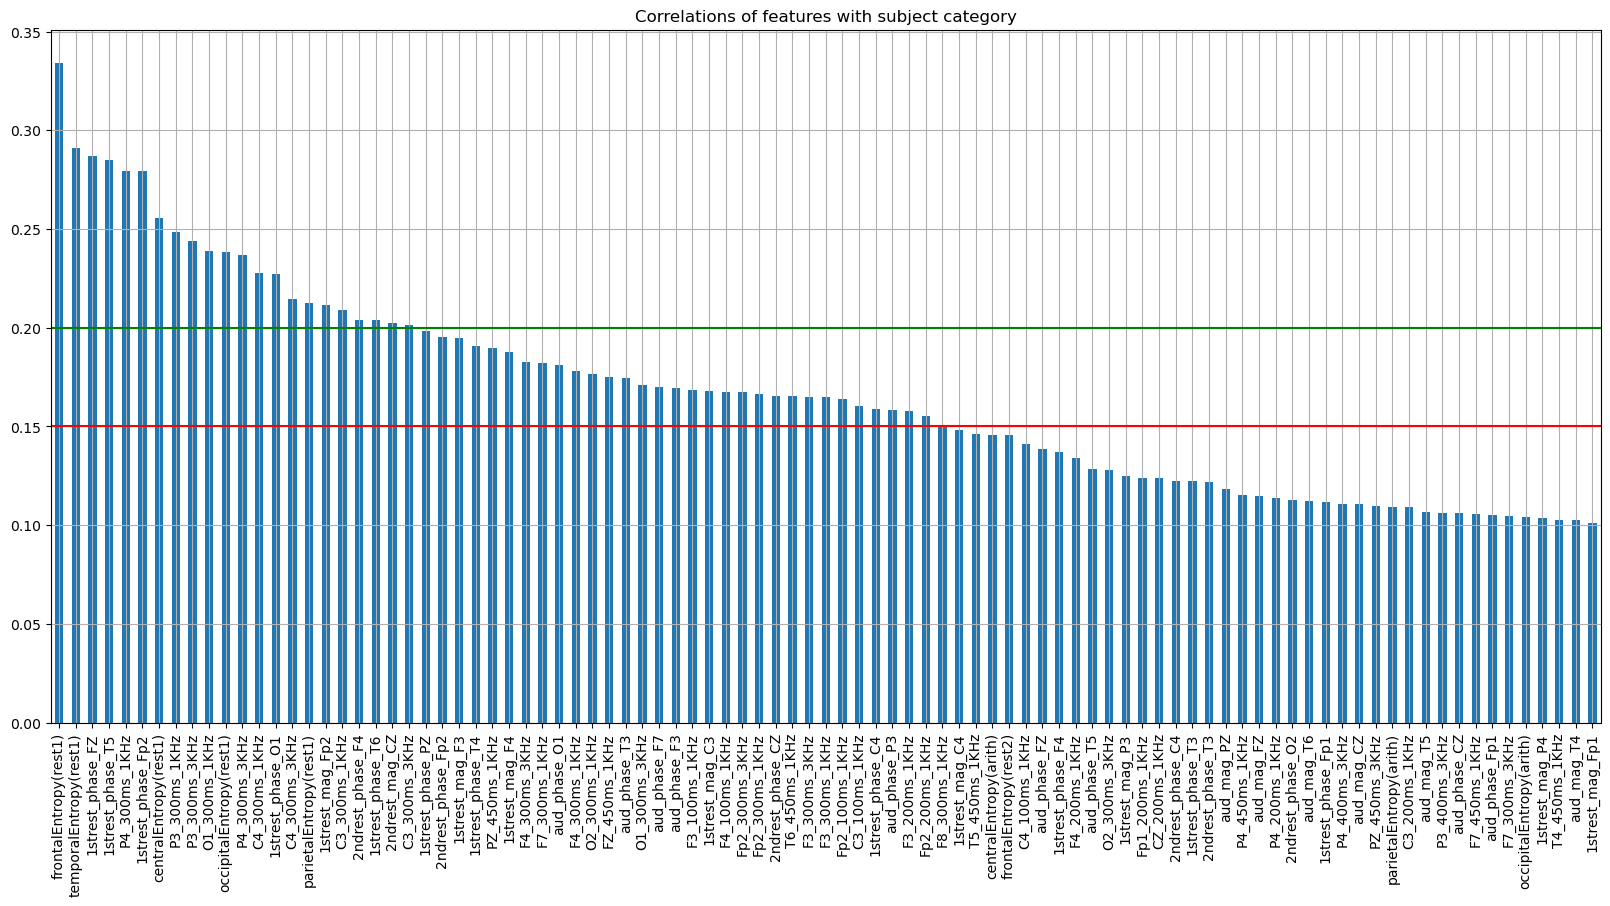

In [13]:
features_correlation.plot.bar(
    figsize=(20,9), title='Correlations of features with subject category', grid=True
)
plt.axhline(y=0.2, color='green', linestyle='-')
plt.axhline(y=0.15, color='red', linestyle='-')

In [14]:
corr_threshold_15 = len(features_correlation[features_correlation>=0.15])
corr_threshold_2 = len(features_correlation[features_correlation>=0.2])
corr_threshold_25 = len(features_correlation[features_correlation>=0.25])
print('NO of features with corr > 0.15:',corr_threshold_15)
print('NO of features with corr > 0.20:',corr_threshold_2)
print('NO of features with corr > 0.25:',corr_threshold_25)

NO of features with corr > 0.15: 54
NO of features with corr > 0.20: 22
NO of features with corr > 0.25: 7


Text(0.5, 1.0, 'Correlation of features having correlation value with catgory freather than 0.25')

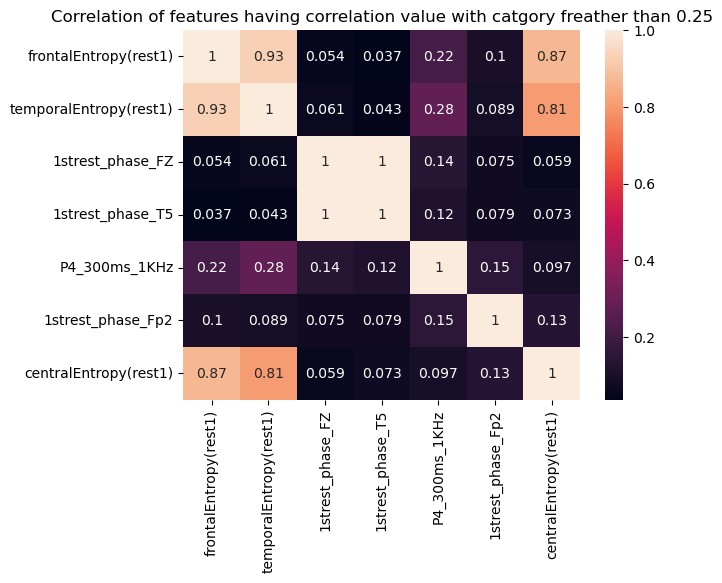

In [15]:
best_correlated_features = dataset2[features_correlation.index.to_list()[0:7]]
# best_correlated_features['category'] = dataset.category=='Patient'
sns.heatmap(abs(best_correlated_features.corr()), annot=True)
plt.title('Correlation of features having correlation value with catgory freather than 0.25')

Text(0.5, 1.0, 'Correlation of features having correlation value with catgory freather than 0.2')

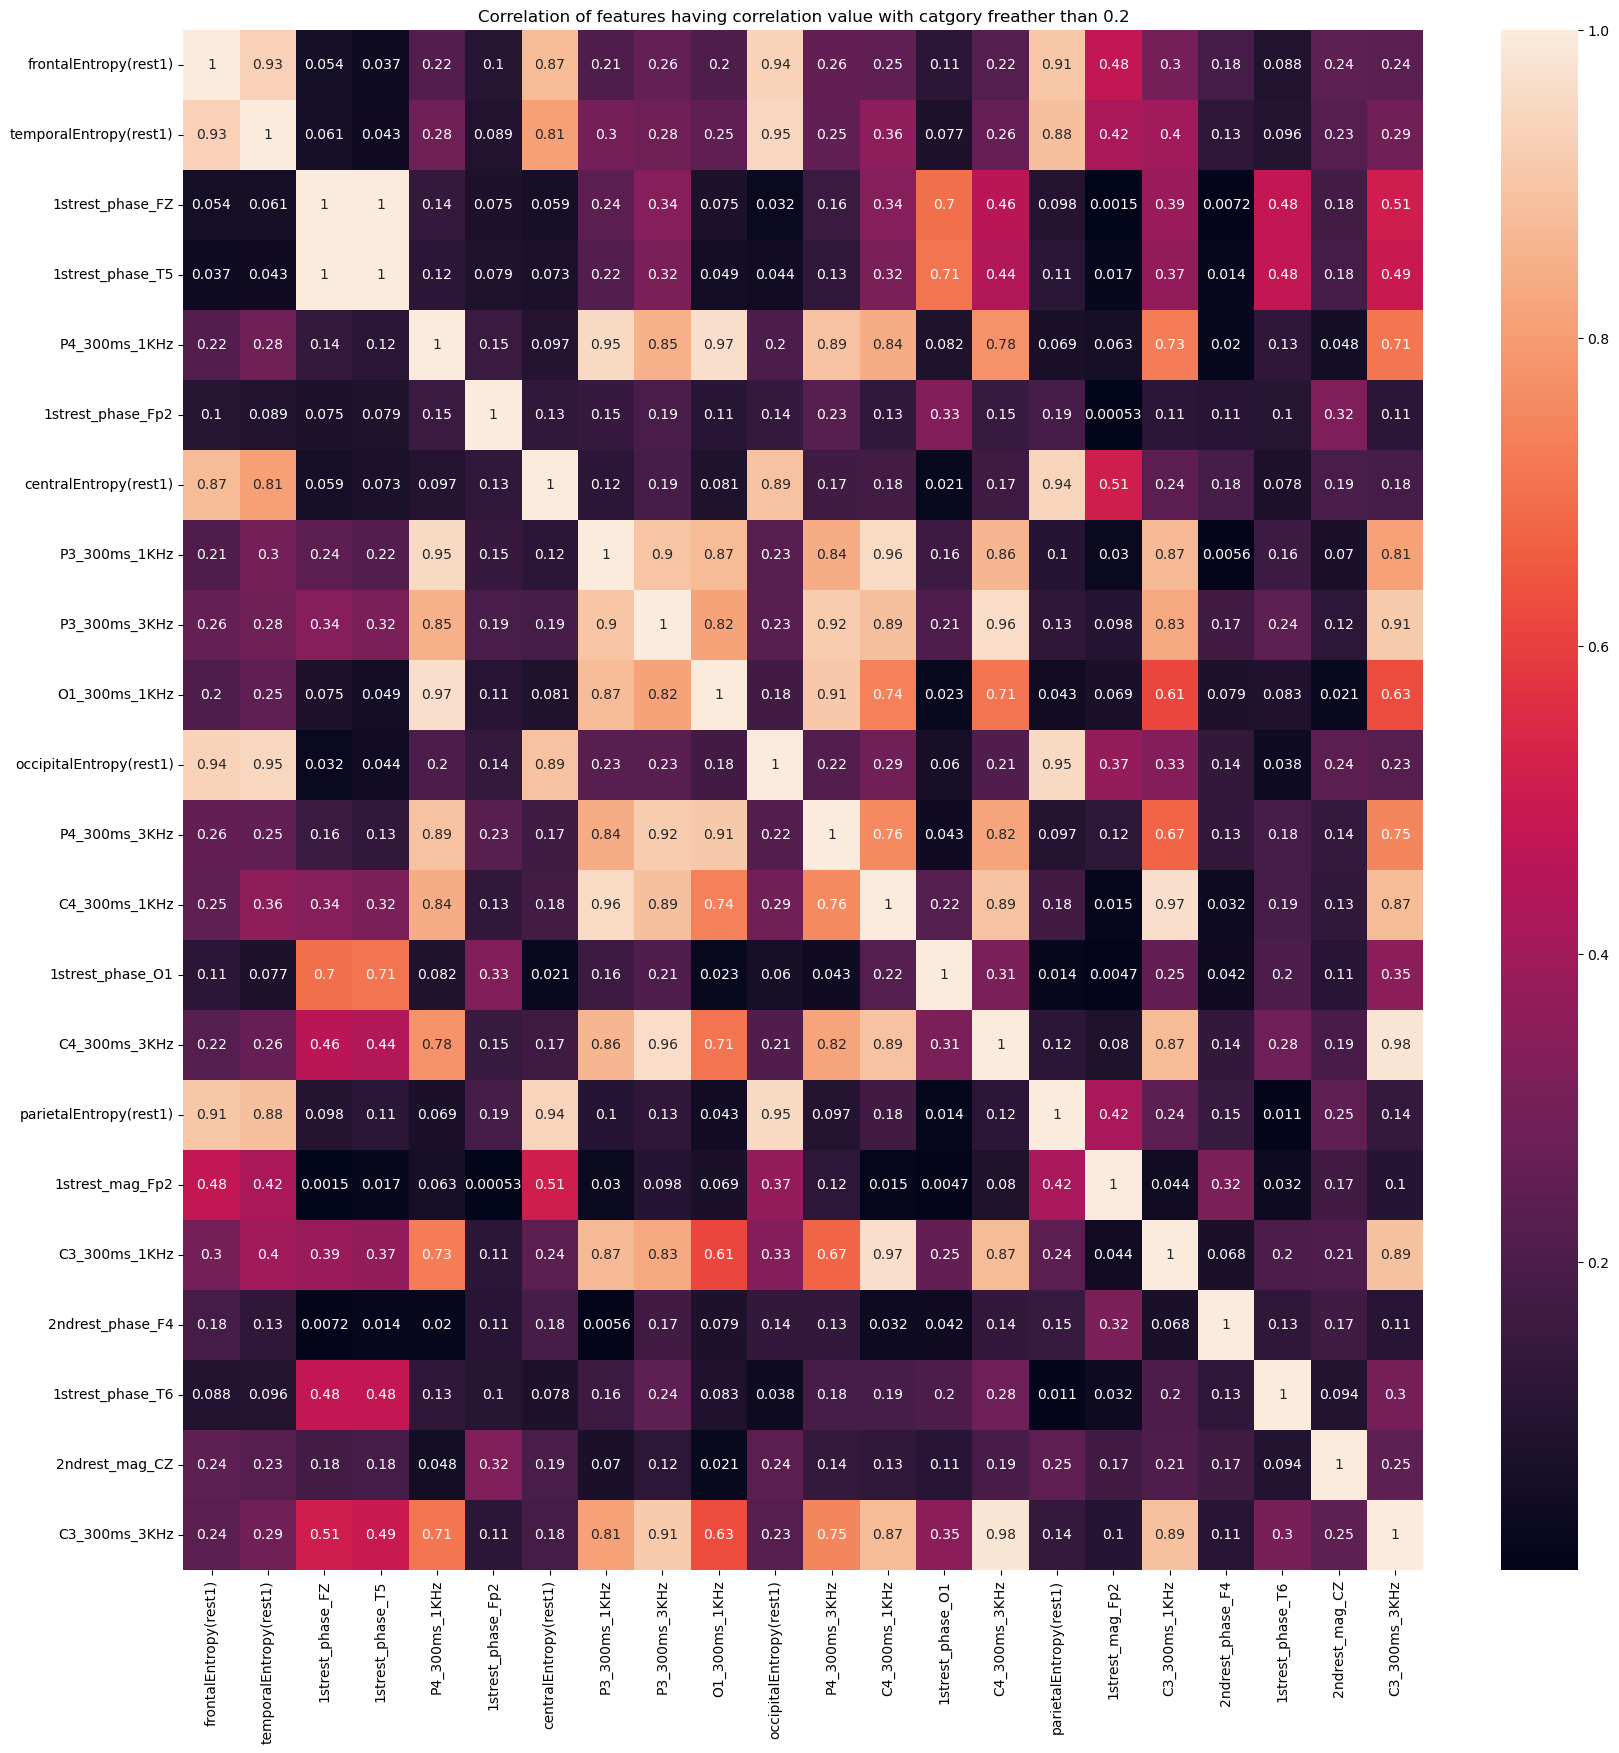

In [16]:
plt.figure(figsize=(20,20))
best_correlated_features = dataset2[features_correlation.index.to_list()[0:22]]
# best_correlated_features['category'] = dataset.category=='Patient'
sns.heatmap(abs(best_correlated_features.corr()), annot=True)
plt.title('Correlation of features having correlation value with catgory freather than 0.2')

Text(0.5, 1.0, 'Correlation of features having correlation value with catgory freather than 0.2')

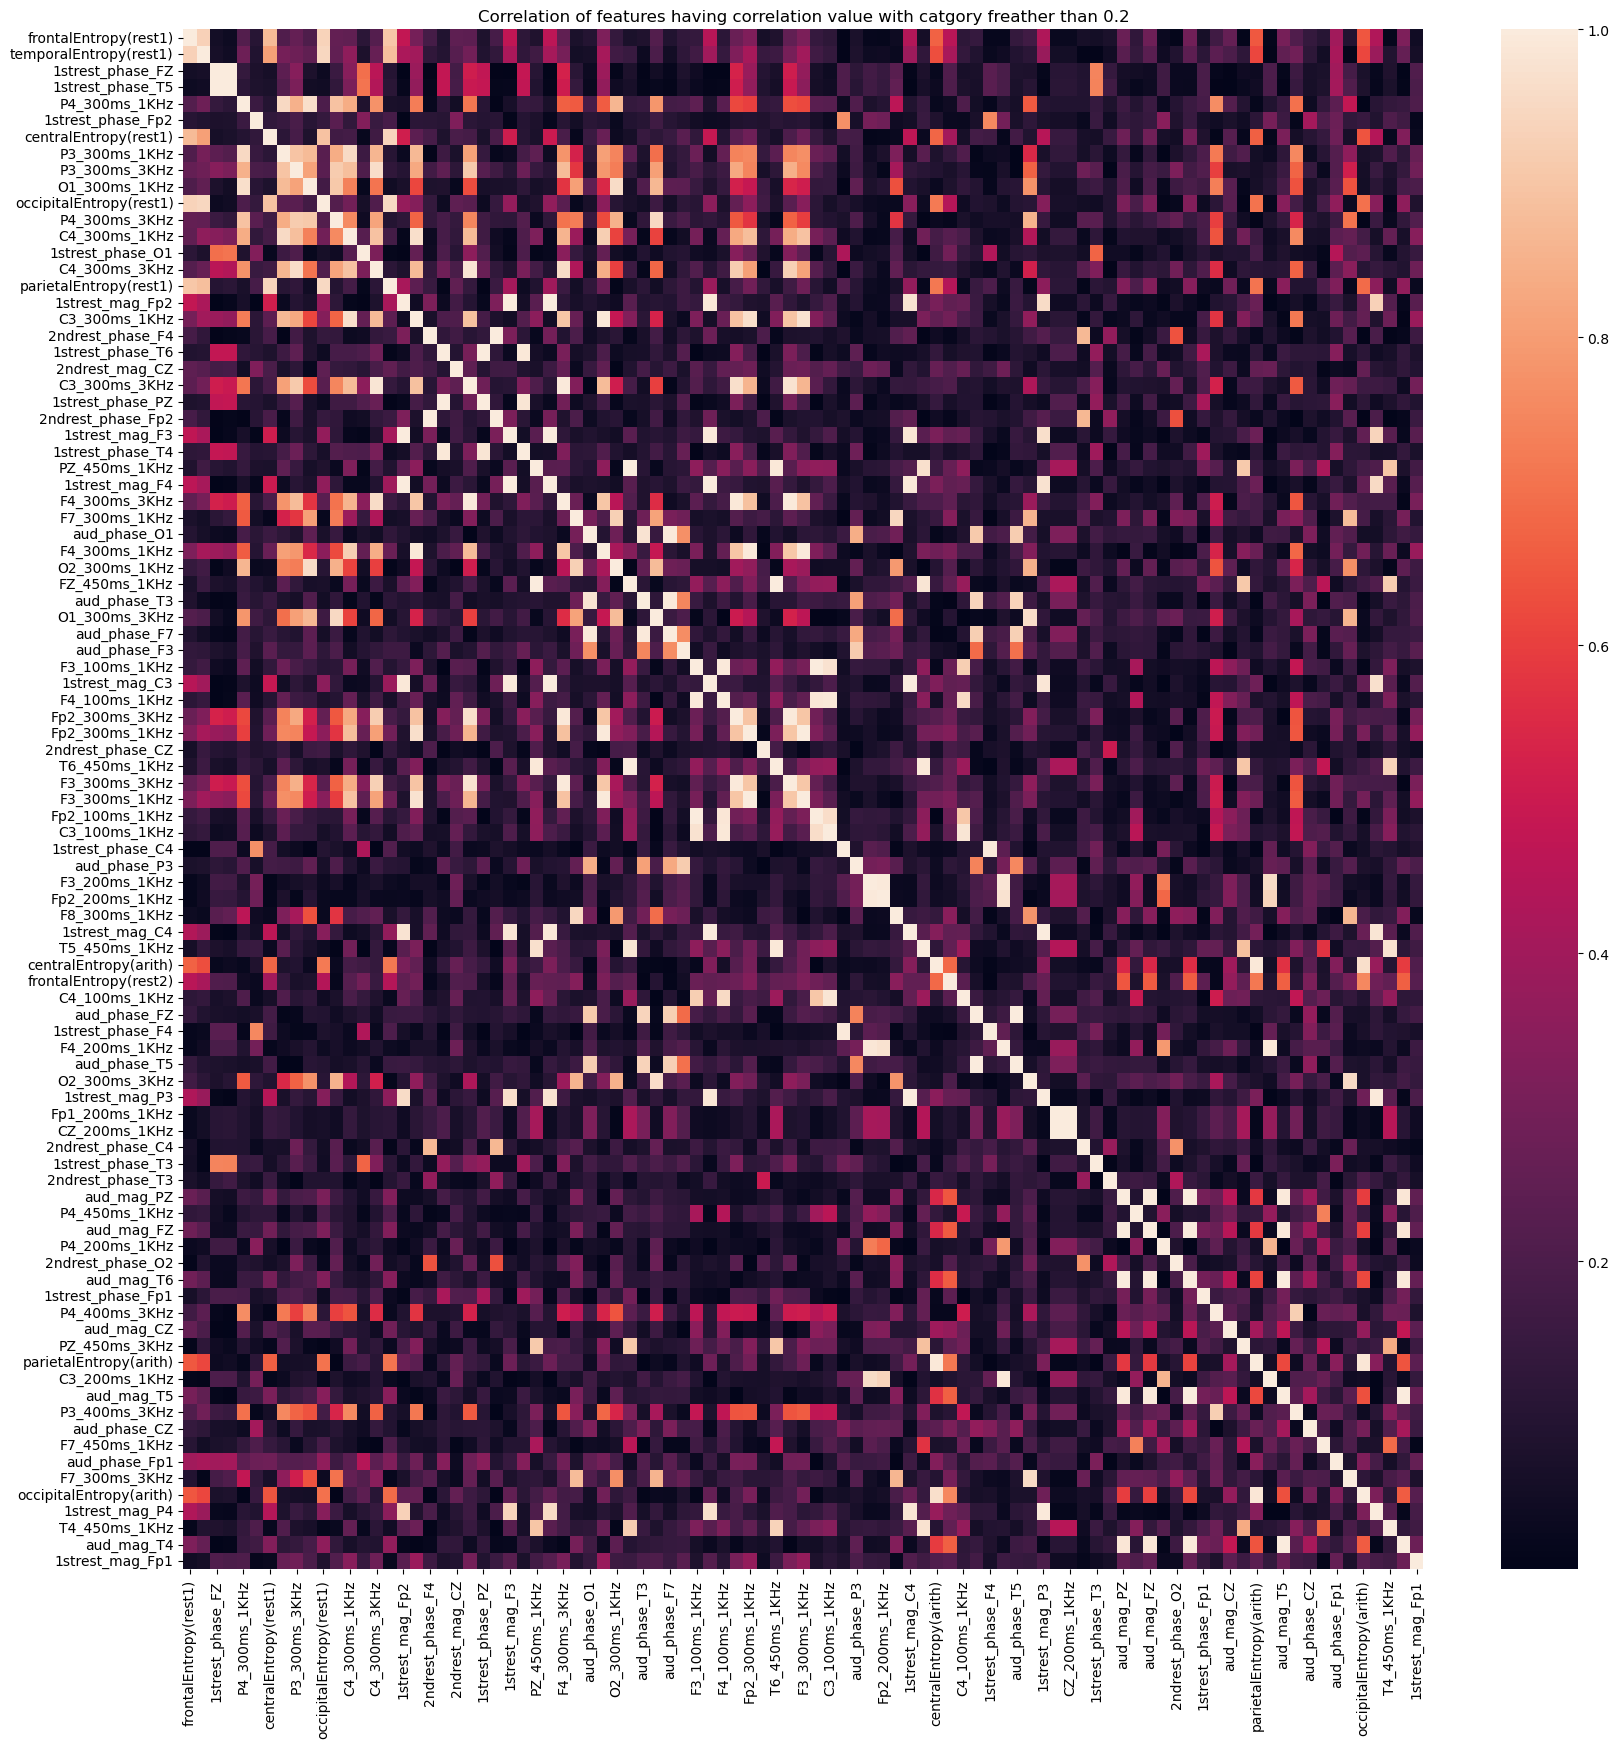

In [17]:
plt.figure(figsize=(20,20))
best_correlated_features = dataset2[features_correlation.index.to_list()[0:93]]
# best_correlated_features['category'] = dataset.category=='Patient'
sns.heatmap(abs(best_correlated_features.corr()),)
plt.title('Correlation of features having correlation value with catgory freather than 0.2')

# Modelling Theories

## Imports

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
metrics = [
        accuracy_score,precision_score,
        recall_score,f1_score
    ]

In [5]:
best_models = joblib.load('../models/best_models.model')
checkpoint_models = dict()

/home/emmanuel/miniconda3/lib/python3.10/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.2.1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
import generisAPI
import generisAPI.ml_models as ml_models
import importlib
importlib.reload(generisAPI.ml_models)

<module 'generisAPI.ml_models' from '/media/emmanuel/DATA/Emmanuel_petron_Olateju/github/ubuntu/MMN_SZ/notebooks/generisAPI/ml_models.py'>

# Theorem 1: 
- *Dominant and latent relationships existing in-between all predictor features, all contribute to performance of instrument*

## best features

### Dataset

In [ ]:
electrodes=[
    'Fp1','Fp2','F3','F4','C3',
    'C4','P3','P4','O1','O2',
    'F7','F8','T3','T4','T5',
    'T6','FZ','PZ','CZ',
    ]

In [ ]:
def rtn(list_val,col_val):
    for val in list_val:
        if val in col_val:
            return True
    return False

In [29]:
mmn_cols = [col for col in dataset.columns if 'ms' in col]
# mmn_cols
best_features = [col for col in mmn_cols if rtn(electrodes[6:],col)]
best_features = best_features + [col for col in dataset.columns if 'Entropy' in col]
best_features = best_features + [col for col in dataset.columns if 'mag' in col]
len(best_features)

best_dataset = dataset[best_features]
best_dataset.shape

(45, 202)

In [31]:
X = best_dataset.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

print(X.shape, y.shape)

(45, 202) (45,)


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(36, 202) (9, 202)
(36,) (9,)


### Classifiers

In [49]:
best_features_classifiers_performance = pd.DataFrame(columns=['model','accuracy','precision','recall','f1'])

In [50]:
from sklearn.linear_model import LogisticRegression

log_clf = ml_models.model('LogisticRegression',LogisticRegression,metrics,'Theorem 1','best features used','0.0')
accuracy, precision, recall, f1 = _scores = log_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
best_features_classifiers_performance = best_features_classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [log_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = log_clf.checkpoint_save(checkpoint_models)

[0.4444444444444444, 0.0, 0.0, 0.0]


/tmp/ipykernel_5342/2250121740.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_features_classifiers_performance = best_features_classifiers_performance.append(


In [52]:
from xgboost import XGBClassifier

xgb_clf = ml_models.model('xgboost',XGBClassifier,metrics,'Theorem 1','best features used','0.0')
accuracy, precision, recall, f1 = _scores = xgb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
best_features_classifiers_performance = best_features_classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [xgb_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = log_clf.checkpoint_save(checkpoint_models)

[0.4444444444444444, 0.3333333333333333, 0.25, 0.28571428571428575]


/tmp/ipykernel_5342/2293491272.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_features_classifiers_performance = best_features_classifiers_performance.append(


In [54]:
from sklearn.svm import SVC

svm_clf = ml_models.model('SVC',SVC,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = svm_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
best_features_classifiers_performance = best_features_classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [svm_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = svm_clf.checkpoint_save(checkpoint_models)

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_5342/1189154048.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_features_classifiers_performance = best_features_classifiers_performance.append(


In [56]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = ml_models.model('DecisionTree',DecisionTreeClassifier,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = dec_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
best_features_classifiers_performance = best_features_classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [dec_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = dec_clf.checkpoint_save(checkpoint_models)

[0.5555555555555556, 0.5, 0.25, 0.3333333333333333]


/tmp/ipykernel_5342/358703609.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_features_classifiers_performance = best_features_classifiers_performance.append(


In [58]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = ml_models.model('RandomForest',RandomForestClassifier,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = rnd_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
best_features_classifiers_performance = best_features_classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [rnd_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = rnd_clf.checkpoint_save(checkpoint_models)

[0.3333333333333333, 0.0, 0.0, 0.0]


/tmp/ipykernel_5342/570959166.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_features_classifiers_performance = best_features_classifiers_performance.append(


In [60]:
from sklearn.naive_bayes import GaussianNB

nb_clf = ml_models.model('NaiveBayes',GaussianNB,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = nb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
best_features_classifiers_performance = best_features_classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [nb_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = nb_clf.checkpoint_save(checkpoint_models)

[0.5555555555555556, 0.5, 0.5, 0.5]


/tmp/ipykernel_5342/2762966480.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_features_classifiers_performance = best_features_classifiers_performance.append(


#### optimized model


In [63]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

params = {
    'var_smoothing':list(np.linspace(1E-11,1E-6,100000)),
}

_search = GridSearchCV(GaussianNB(),params,scoring="accuracy",n_jobs=-1,cv=3)

_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-11, 2e-11, 3e-11, 4e-11,
                                           4.9999999999999995e-11, 6e-11, 7e-11,
                                           8e-11, 9e-11, 1e-10, 1.1e-10,
                                           1.2e-10, 1.3e-10,
                                           1.3999999999999998e-10,
                                           1.4999999999999997e-10, 1.6e-10,
                                           1.6999999999999998e-10,
                                           1.7999999999999997e-10, 1.9e-10,
                                           1.9999999999999998e-10,
                                           2.0999999999999997e-10, 2.2e-10,
                                           2.2999999999999998e-10, 2.4e-10,
                                           2.5e-10, 2.6e-10, 2.7e-10, 2.8e-10,
                                           2.9e-10, 3e-10, ...]},
             scoring='accuracy')

In [66]:
y_pred = _search.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

best_features_classifiers_performance = best_features_classifiers_performance.append({
    'model':'optimized SVC',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
},ignore_index=True)

/tmp/ipykernel_5342/1705732466.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_features_classifiers_performance = best_features_classifiers_performance.append({


In [ ]:
# checkpoint_models['optimized'] = {
#     'model': _search.best_estimator_,
#     'Theorem': 'Theorem1',
#     'description':'alal features used',
#     'features_version':'0.1'
# }

In [68]:
best_features_classifiers_performance.to_csv('../models/best_features_classifiers_performance.csv')

## all features

### Dataset

In [21]:
features_ofinterest = features_correlation.index.to_list()

# X = dataset.drop(columns='category', inplace=False)[features_ofinterest].to_numpy()
X = dataset.drop(columns='category', inplace=False).to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

print(X.shape, y.shape)

(45, 320) (45,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(36, 320) (9, 320)
(36,) (9,)


### Classifiers

In [45]:
classifiers_performance = pd.DataFrame(columns=['model','accuracy','precision','recall','f1'])

#### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

log_clf = ml_models.model('LogisticRegression',LogisticRegression,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = log_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
classifiers_performance = classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [log_clf.name]+_scores
    )),
    ignore_index=True
)
checkpoint_models = log_clf.checkpoint_save(checkpoint_models)

[0.5555555555555556, 0.5, 0.5, 0.5]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_32126/2708056557.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_performance = classifiers_performance.append(


#### XGBoost

In [48]:
from xgboost import XGBClassifier

xg_clf = ml_models.model('xgboost',XGBClassifier,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = xg_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
classifiers_performance = classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [xg_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = log_clf.checkpoint_save(checkpoint_models)

[0.6666666666666666, 1.0, 0.25, 0.4]


/tmp/ipykernel_32126/2158083948.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_performance = classifiers_performance.append(


#### Support Vector Machine

In [53]:
from sklearn.svm import SVC

svm_clf = ml_models.model('SVC',SVC,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = svm_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
classifiers_performance = classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [svm_clf.name]+_scores
    )),
    ignore_index=True
)
checkpoint_models = svm_clf.checkpoint_save(checkpoint_models)

[0.7777777777777778, 0.75, 0.75, 0.75]


/tmp/ipykernel_32126/2401145724.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_performance = classifiers_performance.append(


#### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = ml_models.model('DecisionTree',DecisionTreeClassifier,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = dec_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
classifiers_performance = classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [dec_clf.name]+_scores
    )),
    ignore_index=True
)
checkpoint_models = dec_clf.checkpoint_save(checkpoint_models)

[0.6666666666666666, 0.6666666666666666, 0.5, 0.5714285714285715]


/tmp/ipykernel_32126/80869457.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_performance = classifiers_performance.append(


#### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = ml_models.model('RandomForest',RandomForestClassifier,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = rnd_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
classifiers_performance = classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [rnd_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = rnd_clf.checkpoint_save(checkpoint_models)

[0.4444444444444444, 0.0, 0.0, 0.0]


/tmp/ipykernel_32126/2604944664.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_performance = classifiers_performance.append(


#### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

nb_clf = ml_models.model('NaiveBayes',GaussianNB,metrics,'Theorem 1','all features used','0.0')
accuracy, precision, recall, f1 = _scores = nb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
classifiers_performance = classifiers_performance.append(
    dict(
        zip(
            ['model','accuracy','precision','recall','f1'],
            [nb_clf.name]+_scores
    )),
    ignore_index=True
)
# checkpoint_models = nb_clf.checkpoint_save(checkpoint_models)

[0.3333333333333333, 0.0, 0.0, 0.0]


/tmp/ipykernel_32126/2934208032.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_performance = classifiers_performance.append(


#### MLPN

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

num_features = 320

mlpn = Sequential()

mlpn.add(Dense(64,activation='relu',input_shape=(num_features,)))
mlpn.add(Dense(32, activation='relu'))
mlpn.add(Dense(16, activation='relu'))
mlpn.add(Dense(1, activation='sigmoid'))

mlpn.compile(optimizer='Adamax', loss='binary_crossentropy',metrics=['accuracy'])
mlpn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                20544     
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 23,169
Trainable params: 23,169
Non-trainable params: 0
_________________________________________________________________


In [87]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = mlpn.fit(
    tf.convert_to_tensor(X_train.astype('float')),
    tf.convert_to_tensor(y_train.astype('float')),
    epochs = 50, batch_size = 20,
    validation_data = (
        tf.convert_to_tensor(X_test.astype('float')),
        tf.convert_to_tensor(y_test.astype('float'))
    ),
    callbacks = [early_stopping],
)

loss, accuracy = mlpn.evaluate(
    tf.convert_to_tensor(X_test.astype('float')),
    tf.convert_to_tensor(y_test.astype('float'))
)

print("Test loss: {loss}".format(loss=loss))
print("Test Accuracy: {accuracy}".format(accuracy=accuracy))

Epoch 1/50


2/2 [==============================] - 1s 156ms/step - loss: 2.5374 - accuracy: 0.5833 - val_loss: 1.4519 - val_accuracy: 0.5556
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 1.0875 - accuracy: 0.6389 - val_loss: 0.6638 - val_accuracy: 0.7778
Epoch 3/50
2/2 [==============================] - 0s 27ms/step - loss: 0.5607 - accuracy: 0.7222 - val_loss: 0.9067 - val_accuracy: 0.4444
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 0.9047 - accuracy: 0.5556 - val_loss: 0.8201 - val_accuracy: 0.4444
Epoch 5/50
2/2 [==============================] - 0s 29ms/step - loss: 0.7355 - accuracy: 0.5833 - val_loss: 0.6613 - val_accuracy: 0.7778
Epoch 6/50
2/2 [==============================] - 0s 28ms/step - loss: 0.5211 - accuracy: 0.6944 - val_loss: 0.7306 - val_accuracy: 0.5556
Epoch 7/50
2/2 [==============================] - 0s 30ms/step - loss: 0.5032 - accuracy: 0.7222 - val_loss: 0.8479 - val_accuracy: 0.6667
Epoch 8/50
2/2 [=====================

In [88]:
y_pred = mlpn.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()
y_pred = (y_pred>=0.5).astype('int')

print({
    'model':'MLPN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
})

1/1 [==============================] - 0s 67ms/step
{'model': 'MLPN', 'accuracy': 0.7777777777777778, 'precision': 0.75, 'recall': 0.75, 'f1': 0.75}


In [89]:
mlpn.save('../models/mlpn.h5')

In [90]:
saved_mlpn = tf.keras.models.load_model('../models/mlpn.h5')

y_pred = saved_mlpn.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()
y_pred = (y_pred>=0.5).astype('int')

classifiers_performance = classifiers_performance.append({
    'model':'MLPN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
},ignore_index=True)


1/1 [==============================] - 0s 333ms/step


/tmp/ipykernel_32126/799908280.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_performance = classifiers_performance.append({


In [91]:
classifiers_performance

model  accuracy  precision  recall        f1
0  LogisticRegression  0.555556   0.500000    0.50  0.500000
1             xgboost  0.666667   1.000000    0.25  0.400000
2                 SVC  0.777778   0.750000    0.75  0.750000
3        DecisionTree  0.666667   0.666667    0.50  0.571429
4        RandomForest  0.444444   0.000000    0.00  0.000000
5          NaiveBayes  0.333333   0.000000    0.00  0.000000
6                MLPN  0.777778   0.750000    0.75  0.750000

#### optimized model


In [129]:
X_train.shape

(36, 320)

In [92]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.svm import SVC

clf = SVC(random_state=0)
params = {
    'C':list(np.linspace(0,1,10)),
    'kernel':['linear','poly','rbf','sigmoid'],
    'degree':[2,3,4,5],
    'gamma':['scale','auto']
}

optimizer = RandomizedSearchCV(clf,params,scoring='accuracy',n_jobs=-1,cv=2)

optimizer.fit(X_train,y_train)

/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/base.py", line 581, in _valida

RandomizedSearchCV(cv=2, estimator=SVC(random_state=0), n_jobs=-1,
                   param_distributions={'C': [0.0, 0.1111111111111111,
                                              0.2222222222222222,
                                              0.3333333333333333,
                                              0.4444444444444444,
                                              0.5555555555555556,
                                              0.6666666666666666,
                                              0.7777777777777777,
                                              0.8888888888888888, 1.0],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy')

In [94]:
y_pred = optimizer.best_estimator_.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

classifiers_performance = classifiers_performance.append({
    'model':'optimized SVC',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
},ignore_index=True)

/tmp/ipykernel_32126/1801182379.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_performance = classifiers_performance.append({


In [98]:
checkpoint_models['optimized'] = {
    'model': optimizer.best_estimator_,
    'Theorem': 'Theorem1',
    'description':'alal features used',
    'features_version':'0.1'
}

## save current classifiers performance

In [101]:
classifiers_performance.to_csv('../models/current_performance.csv')

In [100]:
classifiers_performance

model  accuracy  precision  recall        f1
0  LogisticRegression  0.555556   0.500000    0.50  0.500000
1             xgboost  0.666667   1.000000    0.25  0.400000
2                 SVC  0.777778   0.750000    0.75  0.750000
3        DecisionTree  0.666667   0.666667    0.50  0.571429
4        RandomForest  0.444444   0.000000    0.00  0.000000
5          NaiveBayes  0.333333   0.000000    0.00  0.000000
6                MLPN  0.777778   0.750000    0.75  0.750000
7       optimized SVC  0.777778   0.750000    0.75  0.750000

# Theorem 2:
- *All entropy features are just sufficient to seperate classes*
- *Just entropy features from rest1 are sufficient for instrument*
- *Just entropy features from rest2 are sufficient for instrument*
- *Just entropy features from arithmetic task are sufficient for instrument*

In [19]:
entropy_classifiers_performance = pd.DataFrame(
    index = pd.MultiIndex.from_product([['rest1','rest2','arith','combined'],['accuracy','precision','recall','f1']]),
)
# entropy_classifiers_performance

## Entropy features from rest1, rest2 & arithmetic task

### Dataset

In [20]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('Entropy' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 15) (36,)
(9, 15) (9,)


### Classifiers

#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=0)

log_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = log_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'LogisticRegression'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### xgboost

In [82]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(random_state=0)
xg_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = xg_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'xgboost'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.5 0.25 0.3333333333333333


#### SVC

In [84]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)

svm_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = svm_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'SVC'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Trees

In [85]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = DecisionTreeClassifier(random_state=0)
dec_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = dec_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'DecisionTree'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.5 0.25 0.3333333333333333


#### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=0)
rnd_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = rnd_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'RandomForest'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Naive BAyes

In [87]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = nb_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'NaiveBayes'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.6666666666666666 1.0 0.25 0.4


#### mlpn

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

num_features = 15

mlpn = Sequential()

mlpn.add(Dense(64,activation='relu',input_shape=(num_features,)))
mlpn.add(Dense(32, activation='relu'))
mlpn.add(Dense(16, activation='relu'))
mlpn.add(Dense(1, activation='sigmoid'))

mlpn.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])
mlpn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1024      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [90]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = mlpn.fit(
    tf.convert_to_tensor(X_train.astype('float')),
    tf.convert_to_tensor(y_train.astype('float')),
    epochs = 10, batch_size = 4,
    validation_data = (
        tf.convert_to_tensor(X_test.astype('float')),
        tf.convert_to_tensor(y_test.astype('float'))
    ),
    callbacks = [early_stopping],
)

loss, accuracy = mlpn.evaluate(
    tf.convert_to_tensor(X_test.astype('float')),
    tf.convert_to_tensor(y_test.astype('float'))
)

print("Test loss: {loss}".format(loss=loss))
print("Test Accuracy: {accuracy}".format(accuracy=accuracy))

Epoch 1/10


9/9 [==============================] - 0s 17ms/step - loss: 0.8236 - accuracy: 0.5556 - val_loss: 0.7375 - val_accuracy: 0.5556
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.5833 - val_loss: 0.7221 - val_accuracy: 0.5556
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5556 - val_loss: 0.6815 - val_accuracy: 0.4444
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.7086 - accuracy: 0.4167 - val_loss: 0.6853 - val_accuracy: 0.3333
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6389 - accuracy: 0.5556 - val_loss: 0.6713 - val_accuracy: 0.7778
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.7186 - accuracy: 0.5833 - val_loss: 0.6760 - val_accuracy: 0.5556
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.6111 - val_loss: 0.8042 - val_accuracy: 0.5556
Epoch 8/10
9/9 [============================

In [91]:
y_pred = mlpn.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()
y_pred = (y_pred>=0.5).astype('int')

print({
    'model':'MLPN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
})
entropy_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'MLPN'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

1/1 [==============================] - 0s 56ms/step
{'model': 'MLPN', 'accuracy': 0.5555555555555556, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### optimized naive-bayes

In [92]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

params = {
    'var_smoothing':list(np.linspace(1E-11,1E-6,100000)),
}

_search = GridSearchCV(GaussianNB(),params,scoring="accuracy",n_jobs=-1,cv=3)

_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-11, 2e-11, 3e-11, 4e-11,
                                           4.9999999999999995e-11, 6e-11, 7e-11,
                                           8e-11, 9e-11, 1e-10, 1.1e-10,
                                           1.2e-10, 1.3e-10,
                                           1.3999999999999998e-10,
                                           1.4999999999999997e-10, 1.6e-10,
                                           1.6999999999999998e-10,
                                           1.7999999999999997e-10, 1.9e-10,
                                           1.9999999999999998e-10,
                                           2.0999999999999997e-10, 2.2e-10,
                                           2.2999999999999998e-10, 2.4e-10,
                                           2.5e-10, 2.6e-10, 2.7e-10, 2.8e-10,
                                           2.9e-10, 3e-10, ...]},
             scoring='accuracy')

In [93]:
_search.best_score_

0.611111111111111

In [94]:
y_pred = _search.best_estimator_.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()

print({
    'model':'MLPN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
})
entropy_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'optimized NaiveBayes'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

{'model': 'MLPN', 'accuracy': 0.6666666666666666, 'precision': 1.0, 'recall': 0.25, 'f1': 0.4}


## Entropy features from rest1

### Dataset

In [96]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('Entropy' in col) and ('rest1' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 5) (36,)
(9, 5) (9,)


### Classifiers

#### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=0)

log_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = log_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest1',['accuracy','precision','recall','f1']),'LogisticRegression'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.6666666666666666 1.0 0.25 0.4


#### XGBoost

In [99]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=0)

xgb_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = xgb_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest1',['accuracy','precision','recall','f1']),'xgboost'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.6666666666666666 1.0 0.25 0.4


#### SVC

In [101]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=0)

svc_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = svc_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest1',['accuracy','precision','recall','f1']),'SVC'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.6666666666666666 1.0 0.25 0.4


#### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = DecisionTreeClassifier(random_state=0)

dec_clf.fit(X_train,y_train)

y_pred = dec_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest1',['accuracy','precision','recall','f1']),'DecisionTree'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.5 0.25 0.3333333333333333


#### Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=0)

rnd_clf.fit(X_train,y_train)

y_pred = rnd_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest1',['accuracy','precision','recall','f1']),'RandomForest'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.6666666666666666 1.0 0.25 0.4


#### Naive Bayes

In [108]:
from sklearn.naive_bayes import GaussianNB


nb_clf = GaussianNB()

nb_clf.fit(X_train,y_train)

y_pred = nb_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest1',['accuracy','precision','recall','f1']),'NaiveBayes'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.6666666666666666 1.0 0.25 0.4


#### mlpn

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

num_features = 5

mlpn = Sequential()

mlpn.add(Dense(64,activation='relu',input_shape=(num_features,)))
mlpn.add(Dense(32, activation='relu'))
mlpn.add(Dense(16, activation='relu'))
mlpn.add(Dense(1, activation='sigmoid'))

mlpn.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])
mlpn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                384       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [111]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = mlpn.fit(
    tf.convert_to_tensor(X_train.astype('float')),
    tf.convert_to_tensor(y_train.astype('float')),
    epochs = 10, batch_size = 4,
    validation_data = (
        tf.convert_to_tensor(X_test.astype('float')),
        tf.convert_to_tensor(y_test.astype('float'))
    ),
    callbacks = [early_stopping],
)

loss, accuracy = mlpn.evaluate(
    tf.convert_to_tensor(X_test.astype('float')),
    tf.convert_to_tensor(y_test.astype('float'))
)

print("Test loss: {loss}".format(loss=loss))
print("Test Accuracy: {accuracy}".format(accuracy=accuracy))

Epoch 1/10


9/9 [==============================] - 0s 17ms/step - loss: 0.7276 - accuracy: 0.3889 - val_loss: 0.7070 - val_accuracy: 0.5556
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.7262 - accuracy: 0.5833 - val_loss: 0.6995 - val_accuracy: 0.3333
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.7179 - accuracy: 0.3889 - val_loss: 0.6956 - val_accuracy: 0.4444
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5556 - val_loss: 0.6973 - val_accuracy: 0.5556
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5833 - val_loss: 0.6976 - val_accuracy: 0.5556
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5833 - val_loss: 0.6977 - val_accuracy: 0.5556
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5833 - val_loss: 0.6972 - val_accuracy: 0.5556
Epoch 8/10
1/1 [============================

In [112]:
y_pred = mlpn.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()
y_pred = (y_pred>=0.5).astype('int')

print({
    'model':'MLPN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
})
entropy_classifiers_performance.loc[('rest1',['accuracy','precision','recall','f1']),'MLPN'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

1/1 [==============================] - 0s 50ms/step
{'model': 'MLPN', 'accuracy': 0.4444444444444444, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}


## Entropy features from rest2

### Dataset

In [114]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('Entropy' in col) and ('rest2' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 5) (36,)
(9, 5) (9,)


### Classifiers

#### Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=0)
log_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = log_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest2',['accuracy','precision','recall','f1']),'LogisticRegression'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.4444444444444444 0.3333333333333333 0.25 0.28571428571428575


#### XGBoost

In [117]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(random_state=0)
xg_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = xg_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest2',['accuracy','precision','recall','f1']),'xgboost'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SVM

In [119]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)
svm_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = svm_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest2',['accuracy','precision','recall','f1']),'SVC'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.5 0.25 0.3333333333333333


#### Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = DecisionTreeClassifier(random_state=0)
dec_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = dec_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest2',['accuracy','precision','recall','f1']),'DecisionTree'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.5 0.5 0.5


#### Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=0)
rnd_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = rnd_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest2',['accuracy','precision','recall','f1']),'RandomForest'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.5 0.25 0.3333333333333333


#### Naive Bayes

In [162]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = nb_clf.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest2',['accuracy','precision','recall','f1']),'NaiveBayes'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

checkpoint_models['rest2EntropyNaiveBayes']= {
        'model':nb_clf,
        'Theorem':'Theorem_2',
        'description':'Uses fuzzy entropy features from 2nd-rest(rest2) phase',
        'features_version':0.0
}

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### mlpn

In [127]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

num_features = 5

mlpn = Sequential()

mlpn.add(Dense(64,activation='relu',input_shape=(num_features,)))
mlpn.add(Dense(32, activation='relu'))
mlpn.add(Dense(16, activation='relu'))
mlpn.add(Dense(1, activation='sigmoid'))

mlpn.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])
mlpn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                384       
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [128]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = mlpn.fit(
    tf.convert_to_tensor(X_train.astype('float')),
    tf.convert_to_tensor(y_train.astype('float')),
    epochs = 10, batch_size = 4,
    validation_data = (
        tf.convert_to_tensor(X_test.astype('float')),
        tf.convert_to_tensor(y_test.astype('float'))
    ),
    callbacks = [early_stopping],
)

loss, accuracy = mlpn.evaluate(
    tf.convert_to_tensor(X_test.astype('float')),
    tf.convert_to_tensor(y_test.astype('float'))
)

print("Test loss: {loss}".format(loss=loss))
print("Test Accuracy: {accuracy}".format(accuracy=accuracy))

Epoch 1/10


9/9 [==============================] - 0s 17ms/step - loss: 0.7066 - accuracy: 0.5278 - val_loss: 0.7228 - val_accuracy: 0.3333
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5556 - val_loss: 0.7286 - val_accuracy: 0.5556
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.7261 - accuracy: 0.5000 - val_loss: 0.7350 - val_accuracy: 0.5556
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.5833 - val_loss: 0.7730 - val_accuracy: 0.5556
Epoch 5/10
9/9 [==============================] - 0s 4ms/step - loss: 0.7053 - accuracy: 0.5833 - val_loss: 0.7361 - val_accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 17ms/step - loss: 0.7228 - accuracy: 0.3333
Test loss: 0.7228465676307678
Test Accuracy: 0.3333333432674408


In [129]:
y_pred = mlpn.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()
y_pred = (y_pred>=0.5).astype('int')

print({
    'model':'MLPN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
})
entropy_classifiers_performance.loc[('rest2',['accuracy','precision','recall','f1']),'MLPN'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

1/1 [==============================] - 0s 49ms/step
{'model': 'MLPN', 'accuracy': 0.3333333333333333, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}


#### Optimized Naive Bayes

In [163]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


params = {
    'var_smoothing':list(np.linspace(1E-11,1E-6,100000)),
}

_search = GridSearchCV(GaussianNB(),params,scoring="accuracy",n_jobs=-1,cv=3)

_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-11, 2e-11, 3e-11, 4e-11,
                                           4.9999999999999995e-11, 6e-11, 7e-11,
                                           8e-11, 9e-11, 1e-10, 1.1e-10,
                                           1.2e-10, 1.3e-10,
                                           1.3999999999999998e-10,
                                           1.4999999999999997e-10, 1.6e-10,
                                           1.6999999999999998e-10,
                                           1.7999999999999997e-10, 1.9e-10,
                                           1.9999999999999998e-10,
                                           2.0999999999999997e-10, 2.2e-10,
                                           2.2999999999999998e-10, 2.4e-10,
                                           2.5e-10, 2.6e-10, 2.7e-10, 2.8e-10,
                                           2.9e-10, 3e-10, ...]},
             scoring='accuracy')

In [164]:
_search.best_score_

0.611111111111111

In [166]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_pred = _search.best_estimator_.predict(X_test)

print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('rest2',['accuracy','precision','recall','f1']),'optimized NaiveBayes'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]
checkpoint_models['rest2EntropyOptimizedNaiveBayes']= {
        'model':_search.best_estimator_,
        'Theorem':'Theorem_2',
        'description':'Uses fuzzy entropy features from 2nd-rest(rest2) phase',
        'features_version':0.0
}

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Entropy features from arithmetic task

### Dataset

In [135]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('Entropy' in col) and ('arith' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 5) (36,)
(9, 5) (9,)


### Classifiers

#### Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=0)
log_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
y_pred = log_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('arith',['accuracy','precision','recall','f1']),'LogisticRegression'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBoost

In [138]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=0)
xgb_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
y_pred = xgb_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('arith',['accuracy','precision','recall','f1']),'xgboost'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.5 0.25 0.3333333333333333


#### SVM

In [139]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=0)
svm_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
y_pred = svm_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('arith',['accuracy','precision','recall','f1']),'SVC'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = DecisionTreeClassifier(random_state=0)
dec_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
y_pred = dec_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('arith',['accuracy','precision','recall','f1']),'DecisionTree'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=0)
rnd_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
y_pred = rnd_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('arith',['accuracy','precision','recall','f1']),'RandomForest'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.5 0.25 0.3333333333333333


#### Naive bayes

In [144]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
y_pred = nb_clf.predict(X_test)
print(
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
)
entropy_classifiers_performance.loc[('arith',['accuracy','precision','recall','f1']),'NaiveBayes'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

0.5555555555555556 0.0 0.0 0.0


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### mlpn

In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

num_features = 5

mlpn = Sequential()

mlpn.add(Dense(64,activation='relu',input_shape=(num_features,)))
mlpn.add(Dense(32, activation='relu'))
mlpn.add(Dense(16, activation='relu'))
mlpn.add(Dense(1, activation='sigmoid'))

mlpn.compile(optimizer='SGD', loss='binary_crossentropy',metrics=['accuracy'])
mlpn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                384       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [148]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = mlpn.fit(
    tf.convert_to_tensor(X_train.astype('float')),
    tf.convert_to_tensor(y_train.astype('float')),
    epochs = 10, batch_size = 4,
    validation_data = (
        tf.convert_to_tensor(X_test.astype('float')),
        tf.convert_to_tensor(y_test.astype('float'))
    ),
    callbacks = [early_stopping],
)

loss, accuracy = mlpn.evaluate(
    tf.convert_to_tensor(X_test.astype('float')),
    tf.convert_to_tensor(y_test.astype('float'))
)

print("Test loss: {loss}".format(loss=loss))
print("Test Accuracy: {accuracy}".format(accuracy=accuracy))

Epoch 1/10


9/9 [==============================] - 0s 19ms/step - loss: 0.7009 - accuracy: 0.5278 - val_loss: 0.6943 - val_accuracy: 0.5556
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.7144 - accuracy: 0.3333 - val_loss: 0.6755 - val_accuracy: 0.5556
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.5833 - val_loss: 0.6800 - val_accuracy: 0.5556
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5833 - val_loss: 0.6825 - val_accuracy: 0.5556
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 0.6789 - accuracy: 0.5833 - val_loss: 0.6833 - val_accuracy: 0.5556
Epoch 6/10
9/9 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5833 - val_loss: 0.6815 - val_accuracy: 0.5556
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6755 - accuracy: 0.5556
Test loss: 0.6754832863807678
Test Accuracy: 0.5555555820465088


In [149]:
y_pred = mlpn.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()
y_pred = (y_pred>=0.5).astype('int')

print({
    'model':'MLPN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
})
entropy_classifiers_performance.loc[('arith',['accuracy','precision','recall','f1']),'MLPN'] = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]

1/1 [==============================] - 0s 52ms/step
{'model': 'MLPN', 'accuracy': 0.5555555555555556, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Save performances

In [153]:
entropy_classifiers_performance = entropy_classifiers_performance.fillna(0)

In [155]:
entropy_classifiers_performance.to_csv('../models/entropy_classifiers_performance.csv')

# Theorem 3
- *All ASSR features are sufficient to seperate classes*
- *Magnitude components of ASSR features are sufficient to seperate classes*
- *Phase compinents of ASSR features are sufficient to seperate classes*

In [23]:
assr_classifiers_performance = pd.DataFrame(
    index = pd.MultiIndex.from_product([['magnitude','phase','combined'],['accuracy','precision','recall','f1']]),
)

## Magnitude and Phase ASSR features

### Dataset

In [48]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('mag' in col) or ('phase' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 114) (36,)
(9, 114) (9,)


/tmp/ipykernel_17896/3913268058.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col] = dataset[col]
/tmp/ipykernel_17896/3913268058.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col] = dataset[col]
/tmp/ipykernel_17896/3913268058.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col

### Classifiers

#### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

log_clf = ml_models.model('ASSR_LogisticRegression',LogisticRegression,metrics,'Theorem 3','all ASSR features used','0.0')
accuracy, precision, recall, f1 = _scores = log_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'LogisticRegression'] = _scores

[0.2222222222222222, 0.0, 0.0, 0.0]


#### XGBoost

In [27]:
from xgboost import XGBClassifier

xg_clf = ml_models.model('ASSR_xgboost',XGBClassifier,metrics,'Theorem 3','all ASSR features used','0.0')
accuracy, precision, recall, f1 = _scores = xg_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'xgboost'] = _scores

[0.4444444444444444, 0.0, 0.0, 0.0]


#### SVC

In [28]:
from sklearn.svm import SVC

svm_clf = ml_models.model('ASSR_SVC',SVC,metrics,'Theorem 3','all ASSR features used','0.0')
accuracy, precision, recall, f1 = _scores = svm_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'SVC'] = _scores

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = ml_models.model('ASSR_DecisionTree',DecisionTreeClassifier,metrics,'Theorem 3','all ASSR features used','0.0')
accuracy, precision, recall, f1 = _scores = dec_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
checkpoint_models = dec_clf.checkpoint_save(checkpoint_models)
assr_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'DecisionTree'] = _scores

[0.6666666666666666, 0.6666666666666666, 0.5, 0.5714285714285715]


#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = ml_models.model('ASSR_RandomForest',RandomForestClassifier,metrics,'Theorem 3','all ASSR features used','0.0')
accuracy, precision, recall, f1 = _scores = rnd_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'RandomForest'] = _scores

[0.4444444444444444, 0.0, 0.0, 0.0]


#### Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

nb_clf = ml_models.model('ASSR_NaiveBayes',GaussianNB,metrics,'Theorem 3','all ASSR features used','0.0')
accuracy, precision, recall, f1 = _scores = nb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'NaiveBayes'] = _scores

[0.2222222222222222, 0.0, 0.0, 0.0]


#### Optimized Model

In [49]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    # 'max_depth':np.arange(2,114,4).tolist()+[None],
    # 'max_leaf_nodes':np.arange(0,114,1).tolist()+[None],
    'min_impurity_decrease':np.arange(0.0,0.1,0.01)
}

_search = GridSearchCV(DecisionTreeClassifier(random_state=0),params,scoring='accuracy',n_jobs=-1,cv=3)

_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [52]:
y_pred = _search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(accuracy,precision,recall,f1)

assr_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'optimized'] = [accuracy,precision,recall,f1]

0.6666666666666666 0.6666666666666666 0.5 0.5714285714285715


In [34]:
checkpoint_models['ASSR_optimized_model']={
    'model':_search.best_estimator_,
    'Theorem':'Theorem 3',
    'description':'optimizing decistion tree using all ASSR features',
    'version':0.0
}

## Magnitude ASSR features components alone

### Dataset

In [36]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('mag' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 57) (36,)
(9, 57) (9,)


### Classifiers

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

log_clf = ml_models.model('ASSR_Mag_LogisticRegression',LogisticRegression,metrics,'Theorem 3','Magnitude components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = log_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('magnitude',['accuracy','precision','recall','f1']),'LogisticRegression'] = _scores

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### XGBoost

In [38]:
from xgboost import XGBClassifier

xgb_clf = ml_models.model('ASSR_Mag_xgboost',XGBClassifier,metrics,'Theorem 3','Magnitude components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = xgb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('magnitude',['accuracy','precision','recall','f1']),'xgboost'] = _scores

[0.4444444444444444, 0.0, 0.0, 0.0]


#### SVC

In [39]:
from sklearn.svm import SVC

svm_clf = ml_models.model('ASSR_Mag_SVC',SVC,metrics,'Theorem 3','Magnitude components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = svm_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('magnitude',['accuracy','precision','recall','f1']),'SVC'] = _scores

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = ml_models.model('ASSR_Mag_DecisionTree',DecisionTreeClassifier,metrics,'Theorem 3','Magnitude components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = dec_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('magnitude',['accuracy','precision','recall','f1']),'DecisionTree'] = _scores

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = ml_models.model('ASSR_Mag_RandomForest',RandomForestClassifier,metrics,'Theorem 3','Magnitude components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = rnd_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('magnitude',['accuracy','precision','recall','f1']),'RandomForest'] = _scores

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

nb_clf = ml_models.model('ASSR_Mag_NaiveBayes',GaussianNB,metrics,'Theorem 3','Magnitude components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = nb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
checkpoint_models = nb_clf.checkpoint_save(checkpoint_models)
assr_classifiers_performance.loc[('magnitude',['accuracy','precision','recall','f1']),'NaiveBayes'] = _scores

[0.2222222222222222, 0.2, 0.25, 0.22222222222222224]


#### Optimized Naive Bayes

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

params = {
    'var_smoothing':np.arange(1E-9,1E-7,1E-10)
}

_search = GridSearchCV(GaussianNB(),params,scoring='accuracy',n_jobs=-1,cv=3)

_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00e-09, 1.10e-09, 1.20e-09, 1.30e-09, 1.40e-09, 1.50e-09,
       1.60e-09, 1.70e-09, 1.80e-09, 1.90e-09, 2.00e-09, 2.10e-09,
       2.20e-09, 2.30e-09, 2.40e-09, 2.50e-09, 2.60e-09, 2.70e-09,
       2.80e-09, 2.90e-09, 3.00e-09, 3.10e-09, 3.20e-09, 3.30e-09,
       3.40e-09, 3.50e-09, 3.60e-09, 3.70e-09, 3.80e-09, 3.9...
       9.58e-08, 9.59e-08, 9.60e-08, 9.61e-08, 9.62e-08, 9.63e-08,
       9.64e-08, 9.65e-08, 9.66e-08, 9.67e-08, 9.68e-08, 9.69e-08,
       9.70e-08, 9.71e-08, 9.72e-08, 9.73e-08, 9.74e-08, 9.75e-08,
       9.76e-08, 9.77e-08, 9.78e-08, 9.79e-08, 9.80e-08, 9.81e-08,
       9.82e-08, 9.83e-08, 9.84e-08, 9.85e-08, 9.86e-08, 9.87e-08,
       9.88e-08, 9.89e-08, 9.90e-08, 9.91e-08, 9.92e-08, 9.93e-08,
       9.94e-08, 9.95e-08, 9.96e-08, 9.97e-08, 9.98e-08, 9.99e-08])},
             scoring='accuracy')

In [44]:
y_pred = _search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(accuracy,precision,recall,f1)

assr_classifiers_performance.loc[('magnitude',['accuracy','precision','recall','f1']),'optimized'] = _scores

0.2222222222222222 0.2 0.25 0.22222222222222224


In [45]:
checkpoint_models['ASSR_mag_optimized_model']={
    'model':_search.best_estimator_,
    'Theorem':'Theorem 3',
    'description':'optimizing decistion tree using magnitude components of ASSR features',
    'version':0.0
}

## Phase components of ASSR features alone

### Dataset

In [55]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('phase' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 57) (36,)
(9, 57) (9,)


### Classifiers

#### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

log_clf = ml_models.model('ASSR_Phase_LogisticRegression',LogisticRegression,metrics,'Theorem 3','Phase components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = log_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('phase',['accuracy','precision','recall','f1']),'LogisticRegression'] = _scores

[0.2222222222222222, 0.0, 0.0, 0.0]


#### XGBoost

In [57]:
from xgboost import XGBClassifier

xgb_clf = ml_models.model('ASSR_Phase_xgboost',XGBClassifier,metrics,'Theorem 3','Phase components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = xgb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('phase',['accuracy','precision','recall','f1']),'xgboost'] = _scores

[0.4444444444444444, 0.0, 0.0, 0.0]


#### SVC

In [58]:
from sklearn.svm import SVC

svm_clf = ml_models.model('ASSR_Phase_SVC',SVC,metrics,'Theorem 3','Phase components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = svm_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('phase',['accuracy','precision','recall','f1']),'SVC'] = _scores

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = ml_models.model('ASSR_Phase_DecisionTree',DecisionTreeClassifier,metrics,'Theorem 3','Phase components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = dec_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('phase',['accuracy','precision','recall','f1']),'DecisionTree'] = _scores
checkpoint_models = dec_clf.checkpoint_save(checkpoint_models)

[0.5555555555555556, 0.5, 0.5, 0.5]


#### RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = ml_models.model('ASSR_Phase_RandomForest',RandomForestClassifier,metrics,'Theorem 3','Phase components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = rnd_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('phase',['accuracy','precision','recall','f1']),'RandomForest'] = _scores

[0.4444444444444444, 0.0, 0.0, 0.0]


#### Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

nb_clf = ml_models.model('ASSR_Phase_NaiveBayes',GaussianNB,metrics,'Theorem 3','Phase components of ASSR features used alone','0.0')
accuracy, precision, recall, f1 = _scores = nb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
assr_classifiers_performance.loc[('phase',['accuracy','precision','recall','f1']),'NaiveBayes'] = _scores

[0.2222222222222222, 0.0, 0.0, 0.0]


#### Optimized Model

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    # 'max_depth':np.arange(2,114,4).tolist()+[None],
    # 'max_leaf_nodes':np.arange(0,114,1).tolist()+[None],
    'min_impurity_decrease':np.arange(0.0,0.1,0.01)
}

_search = GridSearchCV(DecisionTreeClassifier(random_state=0),params,scoring='accuracy',n_jobs=-1,cv=3)

_search.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_impurity_decrease': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [64]:
y_pred = _search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(accuracy,precision,recall,f1)

assr_classifiers_performance.loc[('phase',['accuracy','precision','recall','f1']),'optimized'] = [accuracy,precision,recall,f1]

0.5555555555555556 0.5 0.5 0.5


In [65]:
checkpoint_models['ASSR_phase_optimized_model']={
    'model':_search.best_estimator_,
    'Theorem':'Theorem 3',
    'description':'optimizing decistion tree using all ASSR features',
    'version':0.0
}

## Save performance

In [81]:
assr_classifiers_performance.to_csv('../models/assr_classifiers_performance.csv')

# Theorem 4
- *All MMN features are sufficient to seperate classes*
- *1K deviant features alone are sufficient to seperate classes*
- *3k features alone are are sufficient to seperate classes*

In [68]:
mmn_classifiers_performance = pd.DataFrame(
    index = pd.MultiIndex.from_product([['1KHz','3KHz','combined'],['accuracy','precision','recall','f1']]),
)

## 1KHz and 3KHz MMN features

### Dataset

In [69]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('1KHz' in col) or ('3KHz' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 190) (36,)
(9, 190) (9,)


/tmp/ipykernel_17896/1287957216.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col] = dataset[col]
/tmp/ipykernel_17896/1287957216.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col] = dataset[col]
/tmp/ipykernel_17896/1287957216.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[col

### Classifiers

#### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

log_clf = ml_models.model('MMN_LogisticRegression',LogisticRegression,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = log_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'LogisticRegression'] = _scores

[0.3333333333333333, 0.0, 0.0, 0.0]


#### XGBoost

In [76]:
from xgboost import XGBClassifier

xg_clf = ml_models.model('MMN_xgboost',XGBClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = xg_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'xgboost'] = _scores

[0.3333333333333333, 0.0, 0.0, 0.0]


#### SVC

In [83]:
from sklearn.svm import SVC

svm_clf = ml_models.model('MMN_SVC',SVC,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = svm_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'SVC'] = _scores

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = ml_models.model('MMN_DecisionTree',DecisionTreeClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = dec_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'DecisionTree'] = _scores

[0.2222222222222222, 0.0, 0.0, 0.0]


#### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = ml_models.model('MMN_RandomForest',RandomForestClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = rnd_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'RandomForest'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.2222222222222222, 0.0, 0.0, 0.0]


#### Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB

nb_clf = ml_models.model('MMN_NaiveBayes',GaussianNB,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = nb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('combined',['accuracy','precision','recall','f1']),'NaiveBayes'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.2222222222222222, 0.0, 0.0, 0.0]


## 1KHz MMN features

### Dataset

In [111]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('1KHz' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 95) (36,)
(9, 95) (9,)


### Classifiers

#### Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

log_clf = ml_models.model('MMN_1KHz_LogisticRegression',LogisticRegression,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = log_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('1KHz',['accuracy','precision','recall','f1']),'LogisticRegression'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.3333333333333333, 0.0, 0.0, 0.0]


#### XGBoost

In [117]:
from xgboost import XGBClassifier

xg_clf = ml_models.model('MMN_1KHz_xgboost',XGBClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = xg_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('1KHz',['accuracy','precision','recall','f1']),'xgboost'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')
checkpoint_models = xg_clf.checkpoint_save(checkpoint_models)

[0.4444444444444444, 0.4, 0.5, 0.4444444444444445]


#### SVC

In [114]:
from sklearn.svm import SVC

svm_clf = ml_models.model('MMN_1KHz_SVC',SVC,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = svm_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('1KHz',['accuracy','precision','recall','f1']),'SVC'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = ml_models.model('MMN_1KHz_DecisionTree',DecisionTreeClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = dec_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('1KHz',['accuracy','precision','recall','f1']),'DecisionTree'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.2222222222222222, 0.0, 0.0, 0.0]


#### Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = ml_models.model('MMN_1KHz_RandomForest',RandomForestClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = rnd_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('1KHz',['accuracy','precision','recall','f1']),'RandomForest'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.3333333333333333, 0.0, 0.0, 0.0]


#### Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB

nb_clf = ml_models.model('MMN_1KHz_NaiveBayes',GaussianNB,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = nb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('1KHz',['accuracy','precision','recall','f1']),'NaiveBayes'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.2222222222222222, 0.0, 0.0, 0.0]


#### Optimized Model

In [128]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

hyperparameter_grid = {
    'n_estimators': [50, 100, 200, 300],   # Number of boosting rounds or trees
    'learning_rate': [0.01, 0.05, 0.1],   # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 5, 7],               # Maximum depth of a tree
    'min_child_weight': [1, 5, 10],       # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2],               # Minimum loss reduction required to make a split
    'subsample': [0.8, 0.9, 1.0],         # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.01, 0.1],          # L1 regularization term on weights
    'reg_lambda': [0, 0.01, 0.1],         # L2 regularization term on weights
    'scale_pos_weight': [1, 2, 5]         # Control the balance of positive and negative weights
}

_search = RandomizedSearchCV(XGBClassifier(random_state=0),params,scoring="accuracy",n_jobs=-1,cv=3)
_search.fit(X_train,y_train)

y_pred = _search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print([accuracy, precision, recall, f1])

mmn_classifiers_performance.loc[('1KHz',['accuracy','precision','recall','f1']),'optimized'] = [accuracy, precision, recall, f1]
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[14:38:13] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "criterion", "min_impurity_decrease", "splitter" } are not used.

[14:38:13] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "criterion", "min_impurity_decrease", "splitter" } are not used.

[14:38:13] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "criterion", "min_impurity_decrease", "splitter" } are not used.

[14:38:13] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "criterion", "min_impurity_decrease", "splitter" } are not used.

[14:38:13] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "criterion", "min_impurity_decrease", "splitter" } are not used.

[14:38:13] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "criterion", "min_impurity_decrease", "splitter" } are not used.

[14:38:13] WARNING: /croot/xgboost

In [132]:
checkpoint_models['MMN_1KHz_optimized']={
    'model':_search.best_estimator_,
    'Theorem': 'Theorem 4',
    'description': 'Use of 1KHz duration deviant and 3KHz frequency deviant MMN features',
    'features_version':0.0
}

## 3KHz MMN features

### Dataset

In [137]:
X = pd.DataFrame()
for col in dataset.columns:
    if ('3KHz' in col):
        X[col] = dataset[col]

X = X.to_numpy()
y = (dataset.category == 'Patient').astype(int).to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(36, 95) (36,)
(9, 95) (9,)


### Classifiers

#### Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

log_clf = ml_models.model('MMN_3KHz_LogisticRegression',LogisticRegression,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = log_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('3KHz',['accuracy','precision','recall','f1']),'LogisticRegression'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.3333333333333333, 0.0, 0.0, 0.0]


#### XGBoost

In [140]:
from xgboost import XGBClassifier

xg_clf = ml_models.model('MMN_3KHz_xgboost',XGBClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = xg_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('3KHz',['accuracy','precision','recall','f1']),'xgboost'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')
checkpoint_models = xg_clf.checkpoint_save(checkpoint_models)

[0.3333333333333333, 0.0, 0.0, 0.0]


#### SVC

In [141]:
from sklearn.svm import SVC

svm_clf = ml_models.model('MMN_3KHz_SVC',SVC,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = svm_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('3KHz',['accuracy','precision','recall','f1']),'SVC'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.5555555555555556, 0.0, 0.0, 0.0]


/home/emmanuel/miniconda3/envs/neuroBCI/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

dec_clf = ml_models.model('MMN_3KHz_DecisionTree',DecisionTreeClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = dec_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('3KHz',['accuracy','precision','recall','f1']),'DecisionTree'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.2222222222222222, 0.2, 0.25, 0.22222222222222224]


#### Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = ml_models.model('MMN_3KHz_RandomForest',RandomForestClassifier,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = rnd_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('3KHz',['accuracy','precision','recall','f1']),'RandomForest'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.2222222222222222, 0.0, 0.0, 0.0]


#### Naive Bayes

In [144]:
from sklearn.naive_bayes import GaussianNB

nb_clf = ml_models.model('MMN_3KHz_NaiveBayes',GaussianNB,metrics,'Theorem4','Use of 1KHz duration deviant and 3KHz frequency deviant MMN features','0,0')
accuracy, precision, recall, f1 = _scores = nb_clf.train_test(X_train,y_train,X_test,y_test)
print(_scores)
mmn_classifiers_performance.loc[('3KHz',['accuracy','precision','recall','f1']),'NaiveBayes'] = _scores
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.3333333333333333, 0.0, 0.0, 0.0]


#### Optimized Model

In [148]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

hyperparameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 4, 6, 8],
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"],
    "random_state": [None,0 , 1, 2, 3]
}

_search = RandomizedSearchCV(DecisionTreeClassifier(),params,scoring="accuracy",n_jobs=-1,cv=3)
_search.fit(X_train,y_train)

y_pred = _search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print([accuracy, precision, recall, f1])

mmn_classifiers_performance.loc[('3KHz',['accuracy','precision','recall','f1']),'optimized'] = [accuracy, precision, recall, f1]
mmn_classifiers_performance.to_csv('../models/mmn_classifiers_performance.csv')

[0.6666666666666666, 0.5714285714285714, 1.0, 0.7272727272727273]


In [146]:
checkpoint_models['MMN_3KHz_optimized']={
    'model':_search.best_estimator_,
    'Theorem': 'Theorem 4',
    'description': 'Use of 1KHz duration deviant and 3KHz frequency deviant MMN features',
    'features_version':0.0
}

# Save all checkpointed models

In [102]:
for modelName in checkpoint_models.keys():
    best_models[modelName+'_'+str(checkpoint_models[modelName]['features_version'])] = checkpoint_models[modelName]

In [103]:
joblib.dump(best_models,'../models/best_models.model')

['../models/best_models.model']

# Feature Space data augmentation

In [154]:
X = dataset.drop(columns='category').to_numpy().astype(float)
y = (dataset.category=='Patient').astype(int).to_numpy()

## Adding gaussian Noise

### MLPN

In [318]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

X_gaussian_noise = copy.deepcopy(X_train)
y_noise_augmented = copy.deepcopy(y_train)

per_sample_noise_augmentation_size = 30

for s,sample in enumerate(X_train):
    for i in range(per_sample_noise_augmentation_size):
        X_gaussian_noise = np.vstack((
            X_gaussian_noise,
            X[s,:]+np.random.normal(0,0.1,(1,320))
        ))
        y_noise_augmented = np.append(y_noise_augmented,y_train[s])
(X_gaussian_noise.shape, y_noise_augmented.shape)

num_features = 320

input_layer = Input(shape=(320,))
batch_normalization_layer = BatchNormalization()(input_layer)

layer1_row1 = Dense(320,activation='tanh')(batch_normalization_layer)
layer1_row1_dropout = Dropout(0.1)(layer1_row1)

layer1_row2 = Dense(320,activation='tanh')(batch_normalization_layer)
layer1_row2_dropout = Dropout(0.1)(layer1_row2)

layer1_row3 = Dense(320,activation='tanh')(batch_normalization_layer)
layer1_row3_dropout = Dropout(0.1)(layer1_row3)

fc = Concatenate()([
    layer1_row1_dropout,
    layer1_row2_dropout,
    layer1_row3_dropout
])
fc1 = Dense(160,activation='tanh')(fc)
fc2 = Dense(80,activation='tanh')(fc1)

output_layer = Dense(1, activation='sigmoid')(fc2)


rms_prop = RMSprop(learning_rate=1E-6, rho=0.9)
adam = Adam(learning_rate=1E-6)
adamax = Adamax(learning_rate=1E-4)

mlpn = Model(inputs=input_layer, outputs=output_layer)
# mlpn.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])
print(mlpn.summary())

mlpn = Model(inputs=input_layer, outputs=output_layer)
mlpn.compile(optimizer=rms_prop, loss='binary_crossentropy',metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

history = mlpn.fit(
    tf.convert_to_tensor(X_gaussian_noise.astype('float')),
    tf.convert_to_tensor(y_noise_augmented.astype('float')),
    epochs = 1000, batch_size = 500,
    validation_data = (
        tf.convert_to_tensor(X_test.astype('float')),
        tf.convert_to_tensor(y_test.astype('float'))
    ),
    callbacks = [early_stopping],
)

loss, accuracy = mlpn.evaluate(
    tf.convert_to_tensor(X_test.astype('float')),
    tf.convert_to_tensor(y_test.astype('float'))
)

print("Test loss: {loss}".format(loss=loss))
print("Test Accuracy: {accuracy}".format(accuracy=accuracy))

plt.plot(history.history('val_loss'),label='validation loss')
plt.plot(history.history('loss'),label='training loss')

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = mlpn.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()
y_pred = (y_pred>=0.822).astype('int')

_ = {
    'model':'MLPN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
}
print(_)

Epoch 1/1000


3/3 [==============================] - 3s 276ms/step - loss: 0.6997 - accuracy: 0.5419 - val_loss: 0.7536 - val_accuracy: 0.4000
Epoch 2/1000
3/3 [==============================] - 0s 76ms/step - loss: 0.7014 - accuracy: 0.5315 - val_loss: 0.7185 - val_accuracy: 0.4000
Epoch 3/1000
3/3 [==============================] - 0s 79ms/step - loss: 0.7002 - accuracy: 0.5444 - val_loss: 0.6964 - val_accuracy: 0.4000
Epoch 4/1000
3/3 [==============================] - 0s 78ms/step - loss: 0.6914 - accuracy: 0.5524 - val_loss: 0.6817 - val_accuracy: 0.4000
Epoch 5/1000
3/3 [==============================] - 0s 73ms/step - loss: 0.6958 - accuracy: 0.5427 - val_loss: 0.6713 - val_accuracy: 0.4000
Epoch 6/1000
3/3 [==============================] - 0s 59ms/step - loss: 0.6858 - accuracy: 0.5581 - val_loss: 0.6633 - val_accuracy: 0.4000
Epoch 7/1000
3/3 [==============================] - 0s 67ms/step - loss: 0.6898 - accuracy: 0.5524 - val_loss: 0.6573 - val_accuracy: 0.4000
Epoch 8/1000
3/3 [=======

### RBFN

(36, 320) (36,) (9, 320) (9,)
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 64)                20544     
                                                                 
 dense_96 (Dense)            (None, 32)                2080      
                                                                 
 dense_97 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22,657
Trainable params: 22,657
Non-trainable params: 0
_________________________________________________________________


None
Epoch 1/50
6/6 [==============================] - 2s 115ms/step - loss: 4.1530 - accuracy: 0.4167 - val_loss: 1.6230 - val_accuracy: 0.4444
Epoch 2/50
6/6 [==============================] - 0s 27ms/step - loss: 1.1716 - accuracy: 0.5000 - val_loss: 0.5491 - val_accuracy: 0.7778
Epoch 3/50
6/6 [==============================] - 0s 26ms/step - loss: 1.5701 - accuracy: 0.5833 - val_loss: 0.3716 - val_accuracy: 0.7778
Epoch 4/50
6/6 [==============================] - 0s 38ms/step - loss: 0.7679 - accuracy: 0.5833 - val_loss: 0.5658 - val_accuracy: 0.5556
Epoch 5/50
6/6 [==============================] - 0s 37ms/step - loss: 0.8667 - accuracy: 0.4444 - val_loss: 0.3173 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 0s 27ms/step - loss: 0.7794 - accuracy: 0.6111 - val_loss: 0.2979 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 0s 26ms/step - loss: 0.7703 - accuracy: 0.5556 - val_loss: 0.3192 - val_accuracy: 1.0000
Epoch 8/50
6/6 [=====

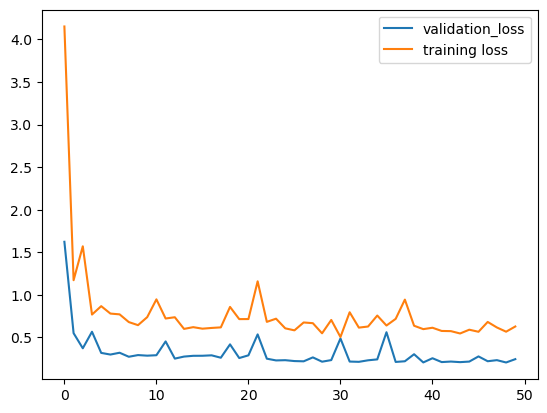

In [156]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# Create a stratified shuffle split object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

if 'model' in dir():
    del model

model = Sequential([
    Dense(64, activation='relu', input_shape=(320,), kernel_initializer=RandomNormal(stddev=0.1)),
    Dense(32, activation='relu', kernel_initializer=RandomNormal(stddev=0.1)),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

print(model.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1E-8)

rms_prop = RMSprop(learning_rate=1E-6, rho=0.9)
adam = Adam(learning_rate=5E-3)
adamax = Adamax(learning_rate=1E-4)
sgd = SGD(learning_rate=1E-3, momentum=0.9, clipnorm=1.0)

model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    tf.convert_to_tensor(X_train.astype('float32')),
    tf.convert_to_tensor(y_train.astype('float32')),
    batch_size = 6, epochs=50,
    # callbacks = [reduce_lr_on_plateau],
    validation_data = [
        tf.convert_to_tensor(X_test.astype('float32')),
        tf.convert_to_tensor(y_test.astype('float32'))
    ]
)

loss, accuracy = model.evaluate(
    tf.convert_to_tensor(X_test.astype('float')),
    tf.convert_to_tensor(y_test.astype('float'))
)

print("Test loss: {loss}".format(loss=loss))
print("Test Accuracy: {accuracy}".format(accuracy=accuracy))

plt.plot(history.history['val_loss'],label='validation_loss')
plt.plot(history.history['loss'],label='training loss')
plt.legend()

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = model.predict(tf.convert_to_tensor(X_test.astype(float))).flatten()
y_pred = (y_pred>=0.5).astype('int')

_ = {
    'model':'RBFN',
    'accuracy':accuracy_score(y_test,y_pred),
    'precision':precision_score(y_test,y_pred),
    'recall':recall_score(y_test,y_pred),
    'f1':f1_score(y_test,y_pred)
}
print(_)

#### Save best performance

In [157]:
model.save('../models/RBFN_gaussianNoise_augmented_v2.h5')
test = load_model('../models/RBFN_gaussianNoise_augmented_v2.h5')

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print(test)
pred = (test.predict(X_test)>0.5).astype('int')
print(accuracy_score(pred,y_test),precision_score(pred,y_test),recall_score(pred,y_test),f1_score(pred,y_test))

1/1 [==============================] - 0s 96ms/step
1.0 1.0 1.0 1.0
